In [3]:

import cv2
import numpy as np
import glob
import os
def calibrate(dirpath):
    """ Apply camera calibration operation for images in the given directory path. """
    # prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(8,6,0)
    CHESS_SQUARE_LEN = 0.027
 
    # termination criteria
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
    # prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
    objp = np.zeros((6*9,3), np.float32)
    objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)*CHESS_SQUARE_LEN
    # Arrays to store object points and image points from all the images.
    objpoints = [] # 3d point in real world space
    imgpoints = [] # 2d points in image plane.
    images = glob.glob(os.path.join(dirpath,"*.jpg"))
    gray = None
    for fname in images:
        print(fname)
        img = cv2.imread(fname)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # Find the chess board corners
        ret, corners = cv2.findChessboardCorners(gray, (9,6), None)
        # If found, add object points, image points (after refining them)
        if ret == True:
            objpoints.append(objp)
            corners2 = cv2.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
            imgpoints.append(corners)
            # Draw and display the corners
            #cv2.drawChessboardCorners(img, (9,6), corners2, ret)
            #cv2.imshow('img', img)
            #cv2.waitKey(500)
        if len(objpoints) > 80:
            break
    print(f'found {len(imgpoints)} valid images' )
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

    return [ret, mtx, dist, rvecs, tvecs]

def saveCoefficients(mtx, dist, path):
    """ Save the camera matrix and the distortion coefficients to given path/file. """
    cv_file = cv2.FileStorage(path, cv2.FILE_STORAGE_WRITE)
    cv_file.write("camera_matrix", mtx)
    cv_file.write("dist_coeff", dist)
    # note you *release* you don't close() a FileStorage object
    cv_file.release()




In [9]:
1640/ 1232

1.3311688311688312

In [15]:
matrix_coefficients

array([[508.72645639,   0.        , 318.37112336],
       [  0.        , 507.05893257, 235.09839991],
       [  0.        ,   0.        ,   1.        ]])

In [16]:
distortion_coefficients

array([[ 0.17261483, -0.283741  , -0.00525303, -0.00035135, -0.14553749]])

In [14]:

ret, matrix_coefficients, distortion_coefficients, rvecs, tvecs = calibrate('calib_images')   
if not os.path.exists( "./params"):
        os.makedirs( "./params")
print('rvecs')
for item in rvecs:
    print(item)
    print()

print('tvecs')
for item in tvecs:
    print(item)
    print()
saveCoefficients(matrix_coefficients, distortion_coefficients, "./params/calibration_coefficients.yaml")

calib_images/571.jpg
calib_images/905.jpg
calib_images/247.jpg
calib_images/1306.jpg
calib_images/999.jpg
calib_images/1280.jpg
calib_images/42.jpg
calib_images/565.jpg
calib_images/203.jpg
calib_images/17.jpg
calib_images/487.jpg
calib_images/547.jpg
calib_images/958.jpg
calib_images/909.jpg
calib_images/1057.jpg
calib_images/1093.jpg
calib_images/243.jpg
calib_images/497.jpg
calib_images/1167.jpg
calib_images/949.jpg
calib_images/771.jpg
calib_images/446.jpg
calib_images/1173.jpg
calib_images/462.jpg
calib_images/934.jpg
calib_images/717.jpg
calib_images/1231.jpg
calib_images/563.jpg
calib_images/863.jpg
calib_images/316.jpg
calib_images/1089.jpg
calib_images/1094.jpg
calib_images/1121.jpg
calib_images/997.jpg
calib_images/667.jpg
calib_images/1028.jpg
calib_images/1001.jpg
calib_images/645.jpg
calib_images/1087.jpg
calib_images/142.jpg
calib_images/1071.jpg
calib_images/1235.jpg
calib_images/143.jpg
calib_images/1100.jpg
calib_images/81.jpg
calib_images/878.jpg
calib_images/1213.jpg

In [4]:
rvec, tvec = rvecs[0], tvecs[0]

In [6]:
rot, jac = cv2.Rodrigues(rvec)

In [7]:
rot

array([[ 0.9835236 ,  0.17786391, -0.03233811],
       [-0.12307807,  0.78982217,  0.60085999],
       [ 0.13241266, -0.58697987,  0.7986999 ]])

In [107]:

dirpath = 'extrinsics_images'
""" Apply camera calibration operation for images in the given directory path. """
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(8,6,0)
CHESS_SQUARE_LEN = 0.027

# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)*CHESS_SQUARE_LEN
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.
images = glob.glob(os.path.join(dirpath,"*.jpg"))
gray = None

items = []
for fname in sorted(images, key=lambda x: int(os.path.basename(x).replace('.jpg', '') ) ) [:100]   :
    print(fname)
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6), None)
    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)
        corners2 = cv2.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
        imgpoints.append(corners)
        items.append((img,corners2) )
        # Draw and display the corners
        #cv2.drawChessboardCorners(img, (9,6), corners2, ret)
        #cv2.imshow('img', img)
        #cv2.waitKey(500)
    if len(objpoints) > 80:
        break
print(f'found {len(imgpoints)} valid images' )



extrinsics_images/17900.jpg
extrinsics_images/17950.jpg
extrinsics_images/18000.jpg
extrinsics_images/18050.jpg
extrinsics_images/18100.jpg
extrinsics_images/18150.jpg
extrinsics_images/18200.jpg
extrinsics_images/18250.jpg
extrinsics_images/18300.jpg
extrinsics_images/18350.jpg
extrinsics_images/18400.jpg
extrinsics_images/18450.jpg
extrinsics_images/18500.jpg
extrinsics_images/18550.jpg
extrinsics_images/18600.jpg
extrinsics_images/18650.jpg
extrinsics_images/18700.jpg
extrinsics_images/18750.jpg
extrinsics_images/18800.jpg
extrinsics_images/18850.jpg
extrinsics_images/18900.jpg
extrinsics_images/18950.jpg
extrinsics_images/19000.jpg
extrinsics_images/19050.jpg
extrinsics_images/19100.jpg
extrinsics_images/19150.jpg
extrinsics_images/19200.jpg
extrinsics_images/19250.jpg
extrinsics_images/19300.jpg
extrinsics_images/19350.jpg
extrinsics_images/19400.jpg
extrinsics_images/19450.jpg
extrinsics_images/19500.jpg
extrinsics_images/19550.jpg
extrinsics_images/19600.jpg
extrinsics_images/19

In [126]:
for (img, corners), grid in zip(items, objpoints):
    cv2.drawChessboardCorners(img, (9,6), corners, 1)
    cv2.imshow('img', img)
    cv2.waitKey(500)

KeyboardInterrupt: 

In [127]:
cv2.drawChessboardCorners(img, (9,6), corners, 1)
cv2.imshow('img', img)

In [109]:
matrix_coefficients = np.array([[508.72645639,   0.        , 318.37112336],
       [  0.        , 507.05893257, 235.09839991],
       [  0.        ,   0.        ,   1.        ]])

distortion_coefficients = np.array([[ 0.17261483, -0.283741  , -0.00525303, -0.00035135, -0.14553749]])

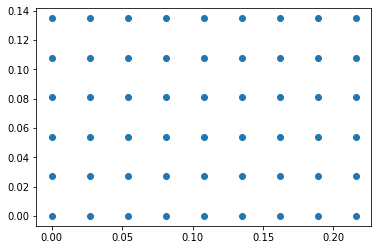

In [37]:

import matplotlib.pyplot as plt

grid = objpoints[0]
plt.scatter(grid[:,0], grid[:,1] )


In [110]:
homog = np.ones((corners.shape[0], 1) )
corners_homog = np.hstack((corners.squeeze(1), homog) )

cam_coords = np.linalg.inv(matrix_coefficients) @ corners_homog.T

cam_coords.T

array([[ 0.13099705,  0.08096803,  1.        ],
       [ 0.14155797,  0.09514381,  1.        ],
       [ 0.14773717,  0.10370327,  1.        ],
       [ 0.16060506,  0.12268522,  1.        ],
       [ 0.17693354,  0.14685739,  1.        ],
       [ 0.20330543,  0.18249838,  1.        ],
       [ 0.22386512,  0.2147094 ,  1.        ],
       [ 0.24752494,  0.24928282,  1.        ],
       [ 0.27420871,  0.28872067,  1.        ],
       [ 0.08764892,  0.08762454,  1.        ],
       [ 0.09157185,  0.09560989,  1.        ],
       [ 0.09677259,  0.10517516,  1.        ],
       [ 0.10832565,  0.12536618,  1.        ],
       [ 0.1209555 ,  0.14728368,  1.        ],
       [ 0.14216751,  0.18520311,  1.        ],
       [ 0.15923289,  0.21710358,  1.        ],
       [ 0.1778681 ,  0.25294005,  1.        ],
       [ 0.20031646,  0.29083902,  1.        ],
       [ 0.03669946,  0.08453468,  1.        ],
       [ 0.0424462 ,  0.09734979,  1.        ],
       [ 0.04690339,  0.10712108,  1.   

In [42]:
objpoints

[array([[0.   , 0.   , 0.   ],
        [0.027, 0.   , 0.   ],
        [0.054, 0.   , 0.   ],
        [0.081, 0.   , 0.   ],
        [0.108, 0.   , 0.   ],
        [0.135, 0.   , 0.   ],
        [0.162, 0.   , 0.   ],
        [0.189, 0.   , 0.   ],
        [0.216, 0.   , 0.   ],
        [0.   , 0.027, 0.   ],
        [0.027, 0.027, 0.   ],
        [0.054, 0.027, 0.   ],
        [0.081, 0.027, 0.   ],
        [0.108, 0.027, 0.   ],
        [0.135, 0.027, 0.   ],
        [0.162, 0.027, 0.   ],
        [0.189, 0.027, 0.   ],
        [0.216, 0.027, 0.   ],
        [0.   , 0.054, 0.   ],
        [0.027, 0.054, 0.   ],
        [0.054, 0.054, 0.   ],
        [0.081, 0.054, 0.   ],
        [0.108, 0.054, 0.   ],
        [0.135, 0.054, 0.   ],
        [0.162, 0.054, 0.   ],
        [0.189, 0.054, 0.   ],
        [0.216, 0.054, 0.   ],
        [0.   , 0.081, 0.   ],
        [0.027, 0.081, 0.   ],
        [0.054, 0.081, 0.   ],
        [0.081, 0.081, 0.   ],
        [0.108, 0.081, 0.   ],
        

In [137]:
import cv2
objectPoints, imagePoints = grid, corners
[success, rvec, tvec] = cv2.solvePnP(objectPoints, imagePoints, matrix_coefficients, distortion_coefficients)
#[...] = cv.solvePnP(..., 'OptionName', optionValue, ...)

In [158]:
import math, numpy as np, cv2
rmat = cv2.Rodrigues(rvec)[0]
cam_pos     = -np.matrix(rmat).T * np.matrix(tvec)
P = np.hstack((rmat,tvec))
euler_angles_radians = -cv2.decomposeProjectionMatrix(P)[6]
euler_angles_degrees = 180 * euler_angles_radians/math.pi


eul    = euler_angles_radians
yaw    = 180*eul[1,0]/math.pi # warn: singularity if camera is facing perfectly upward. Value 0 yaw is given by the Y-axis of the world frame.
pitch  = 180*((eul[0,0]+math.pi/2)*math.cos(eul[1,0]))/math.pi
roll   = 180*( (-(math.pi/2)-eul[0,0])*math.sin(eul[1,0]) + eul[2,0] )/math.pi

In [159]:
pitch

-1281.6213216511896

In [140]:
cam_pos

matrix([[ 0.52270411],
        [ 0.13233097],
        [-0.20211765]])

In [160]:
pitch%360

158.37867834881035

In [148]:
tvec

array([[0.0728568 ],
       [0.04138598],
       [0.56970317]])

In [166]:
R = cv2.Rodrigues(rvec)[0];
R = R.transpose();
pos = -R @ tvec

In [ ]:
world_to_veh = np.eye(3,3)


In [221]:
rototrans = np.eye(4,4)
rototrans[:3,:3] = R
rototrans[:3,[-1]] = pos

In [157]:
rototrans @ tvec

array([[ 0.31779801],
       [ 0.00462395],
       [-0.0749887 ]])

In [220]:
R

array([[ 0.11465906,  0.28169262, -0.95262929],
       [-0.99338297,  0.03888466, -0.108066  ],
       [ 0.00660127,  0.95871646,  0.28428713]])

In [222]:
pos

array([[ 0.52270411],
       [ 0.13233097],
       [-0.20211765]])

In [147]:
newtvec = np.array([10,0,0]).reshape(-1,1)
newpos = -R @ newtvec
newpos

array([[-1.14659063],
       [ 9.93382969],
       [-0.06601266]])

In [167]:
from math import atan2, asin
roll = atan2(-R[2][1], R[2][2])
pitch = asin(R[2][0])
yaw = atan2(-R[1][0], R[0][0])

print(f'roll:{roll*180/np.pi}\npitch:{pitch*180/np.pi}\nyaw:{yaw*180/np.pi}')

roll:-73.48338818311869
pitch:0.378227419983217
yaw:83.4158951794135


In [62]:
rvec.shape
rot, J = cv2.Rodrigues(rvec)



array([[ 0.11515972, -0.99332392,  0.00676968],
       [ 0.28185945,  0.03921041,  0.95865416],
       [-0.95251955, -0.10849025,  0.28449319]])

# object detection

In [ ]:
from imutils import paths
import numpy as np
import imutils
import cv2
def find_marker(image):
    # convert the image to grayscale, blur it, and detect edges
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (5, 5), 0)
    edged = cv2.Canny(gray, 35, 125)
    # find the contours in the edged image and keep the largest one;
    # we'll assume that this is our piece of paper in the image
    cnts = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key = cv2.contourArea)
    # compute the bounding box of the of the paper region and return it
    return cv2.minAreaRect(c)

In [ ]:
def distance_to_camera(knownWidth, focalLength, perWidth):
    # compute and return the distance from the maker to the camera
    return (knownWidth * focalLength) / perWidth

In [ ]:
marker = find_marker(image)
inches = distance_to_camera(KNOWN_WIDTH, focalLength, marker[1][0])

[[318.3711    ]
 [ 80.07453696]]
float64
213 [112.07453696]
426 [112.07453696]
318.3711 300


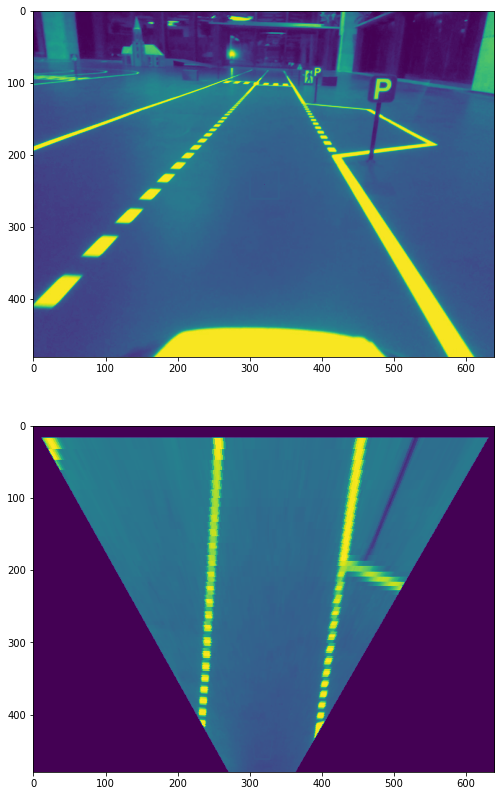

In [58]:
import numpy as np

class IPM(object):
    """
    Inverse perspective mapping to a bird-eye view. Assume pin-hole camera model.
    There are detailed explanation of every step in the comments, and variable names in the code follow these conventions:
    `_c` for camera coordinates
    `_w` for world coordinates
    `uv` for perspective transformed uv 2d coordinates (the input image)
    """
    def __init__(self, camera_info, ipm_info):
        self.camera_info = camera_info
        self.ipm_info = ipm_info

        ## Construct matrices T, R, K
        self.T = np.eye(4)
        self.T[2, 3] = -camera_info.camera_height # 4x4 translation matrix in 3d space (3d homo coordinate)
        _cy = np.cos(camera_info.yaw   * np.pi / 180.)
        _sy = np.sin(camera_info.yaw   * np.pi / 180.)
        _cp = np.cos(camera_info.pitch * np.pi / 180.)
        _sp = np.sin(camera_info.pitch * np.pi / 180.)
        tyaw = np.array([[_cy, 0, -_sy],
                         [0, 1, 0],
                         [_sy, 0, _cy]])
        tyaw_inv = np.array([[_cy, 0, _sy],
                             [0, 1, 0],
                             [-_sy, 0, _cy]])
        tpitch = np.array([[1, 0, 0],
                           [0, _cp, -_sp],
                           [0, _sp, _cp]])
        tpitch_inv = np.array([[1, 0, 0],
                               [0, _cp, _sp],
                               [0, -_sp, _cp]])
        self.R = np.dot(tyaw, tpitch) # 3x3 Rotation matrix in 3d space
        self.R_inv = np.dot(tpitch_inv, tyaw_inv)
        self.K = np.array([[camera_info.f_x, 0, camera_info.u_x],
                           [0, camera_info.f_y, camera_info.u_y],
                           [0, 0, 1]]).astype(np.float) # 3x3 intrinsic perspective projection matrix

        ## The ground plane z=0 in the world coordinates, transform to a plane `np.dot(self.normal_c, point) = self.const_c` in the camera coordinates. 
        # This is used to find (x,y,z)_c according to (u,v). See method `uv2xy` for detail.
        self.normal_c = np.dot(self.R, np.array([0,0,1])[:, None]) # normal of ground plane equation in camera coordinates
        self.const_c = np.dot(self.normal_c.T, 
                              np.dot(self.R,
                                     np.dot(self.T, np.array([0,0,0,1])[:, None])[:3])) # constant of ground plane equation in camera coordinates

        ## Get the limit to be converted on the uv map (must below vanishing point)
        # To calculate (u,v) of the vanishing point on the uv map of delta vector v=[0,1,0] in the world coordinates
        # homo coordinates of a vector will be v_4 = [0, 1, 0, 0], mapping this vector to camera coordinate:
        # vc_3 = np.dot(R_4, np.dot(T_4, v_4))[:3] = np.dot(R, v), the 2d homo coordinate of the vanishing point will be at 
        # lim_{\lambda -> \infty} np.dot(K, lambda * vc_3) = np.dot(K, vc_3)

        # lane_vec_c = np.dot(self.R, np.array([0,1,0])[:, None]) # lane vector in camera coordinates
        # lane_vec_homo_uv = np.dot(self.K, lane_vec) # lane vector on uv map (2d homo coordinate)
        lane_vec_homo_uv = np.dot(self.K, np.dot(self.R, np.array([0,1,0])[:, None])) # lane vector on uv map (2d homo coordinate)
        vp = self.vp = lane_vec_homo_uv[:2] / lane_vec_homo_uv[2] # coordinates of the vanishing point of lanes on uv map

        # UGLY: This is an ugly op to ensure the converted area do not goes beyond the vanishing point, as the camera intrinsic/extrinsic parameters are not accurate in my case.
        ipm_top = self.ipm_top = max(ipm_info.top, vp[1]+ipm_info.input_height/15) 
        print(vp)
        print(vp.dtype)
        print(ipm_info.left, ipm_top)
        print(ipm_info.right, ipm_top)
        print(vp[0].item(), ipm_info.bottom)
        
        uv_limits = self.uv_limits = np.array([[ipm_info.left, ipm_top.item()],
                              [ipm_info.right, ipm_top.item()],
                              [vp[0].item(), ipm_top.item()],
                              [vp[0].item(), ipm_info.bottom]]).T # the limits of the area on the uv map to be IPM-converted

        ## The x,y limit in the world coordinates is used to calculate xy_grid, and then the corresponding uv_grid
        self.xy_limits = self.uv2xy(uv_limits)
        xmin, xmax = min(self.xy_limits[0]), max(self.xy_limits[0])
        ymin, ymax = min(self.xy_limits[1]), max(self.xy_limits[1])
        stepx = (xmax - xmin) / ipm_info.out_width  # x to output pixel ratio
        stepy = (ymax - ymin) / ipm_info.out_height # y to output pixel ratio

        # xy_grid: what x,y coordinates in world coordinates will be stored in every output image pixel
        self.xy_grid = np.array([[(xmin + stepx * (0.5 + j), ymax - stepy * (0.5 + i)) for j in range(ipm_info.out_width)]
                                 for i in range(ipm_info.out_height)]).reshape(-1, 2).T
        # uv_grid: what u,v coordiantes on the uv map will be stored in every output image pixel
        self.uv_grid = self.xy2uv(self.xy_grid).astype(int)
        self.uv_grid = self.uv_grid * ((self.uv_grid[0] > ipm_info.left) * (self.uv_grid[0] < ipm_info.right) *\
                                       (self.uv_grid[1] > ipm_top) * (self.uv_grid[1] < ipm_info.bottom))
        self.uv_grid = tuple(self.uv_grid.reshape(2, ipm_info.out_height, ipm_info.out_width))
        self.uv_grid = (self.uv_grid[1], self.uv_grid[0])

    def xy2uv(self, xys): # all points have z=0 (ground plane): w (u,v,1) = KRT (x,y,z)_w
        xyzs = np.vstack((xys, -self.camera_info.camera_height * np.ones(xys.shape[1]))) # (x,y,z) after translation
        xyzs_c = np.dot(self.K, np.dot(self.R, xyzs)) # w(u,v,1) (2d homo)
        return xyzs_c[:2] / xyzs_c[2]

    def uv2xy(self, uvs): # all points have z=0 (ground plane): find (x,y,z)_c first, then x_w, y_w = (R^-1 (x,y,z)_c)[:2]
        uvs = (uvs - np.array([self.camera_info.u_x, self.camera_info.u_y])[:, None]) /\
              np.array([self.camera_info.f_x, self.camera_info.f_y])[:, None] # converted using camara intrinsic parameters
        uvs = np.vstack((uvs, np.ones(uvs.shape[1])))
        xyz_c = (self.const_c / np.dot(self.normal_c.T, uvs)) * uvs # solve the equation, get (x,y,z) on the ground plane in camera coordinates
        xy_w = np.dot(self.R_inv, xyz_c)[:2, :] # (x, y) on the ground plane in the world coordinates
        return xy_w

    def __call__(self, img):
        return self.ipm(img)

    def ipm(self, img):
        out_img = np.zeros((self.ipm_info.out_height, self.ipm_info.out_width))
        out_img[...] = img[self.uv_grid]
        return out_img

    def reverse_ipm(self, img, shape=None):
        if shape is None:
            shape = img.shape
        out_img = np.zeros(shape)
        out_img[self.uv_grid] = img
        return out_img

class _DictObjHolder(object):
    def __init__(self, dct):
        self.dct = dct

    def __getattr__(self, name):
        return self.dct[name]

if __name__ == "__main__":
    import os
    import sys
    import matplotlib
    from PIL import Image
    import matplotlib.pyplot as plt
    import numpy as np

    class CameraInfo:
        def __init__(self, d):
            self.f_x = d['f_x']
            self.f_y = d['f_y']
            self.u_x = d['u_x']
            self.u_y = d['u_y']
            self.camera_height = d['camera_height']
            self.pitch = d['pitch']
            self.yaw = d['yaw']    
    
    class IpmInfo:
        def __init__(self, d):
            self.input_width = d['input_width']
            self.input_height = d['input_height']
            self.out_width = d['out_width']
            self.out_height = d['out_height']
            self.left = d['left']
            self.right = d['right']
            self.top = d['top']
            self.bottom = d['bottom']
    

    
    default_ipm_info_dict = {
        "input_width": 640,
        "input_height": 480,
        "out_width": 640,
        "out_height": 480,
        "left": 40,
        "right": 600,
        "top": 190,
        "bottom": 400
    }
    
    ipm_info_dict = {
        "input_width": 640,
        "input_height": 480,
        "out_width": 640,
        "out_height": 480,
        "left": 640//3,#0,
        "right": 640*2//3, #  640,
        "top": 100,
        "bottom": 300
    }
    
    
    camera_info_dict = {
        "f_x": 508.726,         # focal length x
        "f_y": 507.0589,         # focal length y
        "u_x": 318.3711,             # optical center x
        "u_y": 235.098,             # optical center y
        "camera_height":200, #202,  # camera height in `mm`
        "pitch": 107,            # rotation degree around x
        "yaw": 0         # rotation degree around y
    }
    camera_info = CameraInfo(camera_info_dict)    
    
    ipm_info = IpmInfo(ipm_info_dict)

    path = '/home/xrh1/datasets/bosch_dataset/boschyolo_trainval_full/images/train/bfmc2020_online_1__frame_001240.jpg'
    #path = '/home/xrh1/Downloads/line2.jpg'
    
    img = Image.open(path) 
    img = img.resize((640, 480))
    
    
    img = np.array(img)
    img[240, 320, : ] = (0,0,255)
    import cv2
    off = 20
    cv2.rectangle(img, (320 - off, 240 -off), (320 + off, 240+ off), (255,0,0), 2)
    
    from scipy import ndimage

    #rotation angle in degree
    #img = ndimage.rotate(img, -90)    

    if len(img.shape) == 3:
        img = np.dot(img, [0.299, 0.587, 0.114])
    ipm = IPM(camera_info, ipm_info)
    out_img = ipm(img)

    fig = plt.figure(figsize=(18,14))
    ax = fig.add_subplot(211)
    ax.imshow(img)
    ax = fig.add_subplot(212)
    ax.imshow(out_img)
    plt.savefig("./try_ipm.png")

In [ ]:
from scipy import ndimage

#rotation angle in degree
rotated = ndimage.rotate(img, 45)

In [46]:
for image_path in sorted(glob.glob('/home/xrh1/datasets/bosch_dataset/boschyolo_trainval_full/images/train/*.jpg'),
                key=lambda x: os.path.basename(x).\
                            replace('.jpg', '').\
                            split('_')[-1]\
                                  ):
    path = image_path #'/home/xrh1/datasets/bosch_dataset/boschyolo_trainval_full/images/train/bfmc2020_online_1__frame_001240.jpg'
    img = Image.open(path) 

    img = img.resize((640, 480))
    
    
    img = np.array(img)
    
    
    if len(img.shape) == 3:
        img = np.dot(img, [0.299, 0.587, 0.114])
    
    out_img = ipm(img)
    #out_img = np.where(ipm.uv_grid[0] > 0,out_img,0)
    newimg = Image.fromarray(out_img).convert('L')
    display(newimg)
    clear_output(wait=True)
    
    '''
    fig = plt.figure(figsize=(18,14))
    ax = fig.add_subplot(211)
    ax.imshow(img)
    ax = fig.add_subplot(212)
    ax.imshow(out_img)
    '''
    #import time
    #time.sleep(0.5)
    #ig = plt.figure(figsize=(18,14))
    #ax = fig.add_subplot(211)
    #ax.imshow(img)
    #ax = fig.add_subplot(212)
    #ax.imshow(out_img)
    #plt.savefig("./try_ipm.png")

KeyboardInterrupt: 

In [288]:
np.unique(ipm.uv_grid[0])

array([  0, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114,
       115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127,
       128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140,
       141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
       154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166,
       167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179,
       180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192,
       193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205,
       206, 207, 208, 210, 211, 212, 213, 215, 216, 217, 218, 220, 221,
       222, 224, 225, 227, 228, 230, 231, 233, 235, 236, 238, 240, 241,
       243, 245, 247, 249, 251, 253, 255, 257, 259, 261, 263, 265, 268,
       270, 273, 275, 278, 280, 283, 286, 289, 291, 294, 298, 301, 304,
       307, 311, 314, 318, 322, 325, 329, 334, 338, 342, 347, 351, 356,
       361, 366, 372, 377, 383, 389, 395, 402, 409, 416, 423, 43

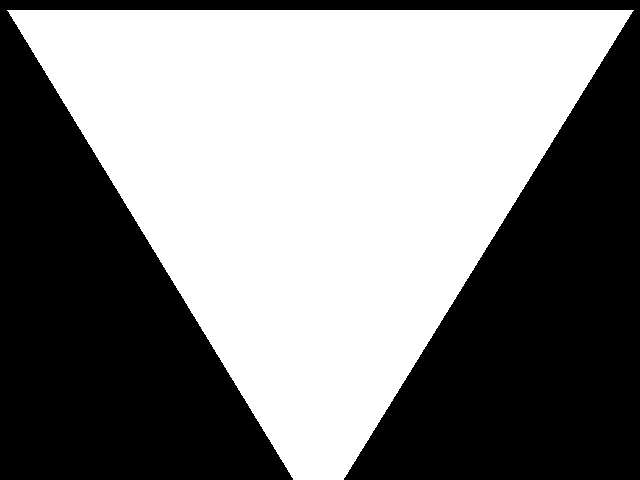

In [289]:
    newimg = Image.fromarray(np.where(ipm.uv_grid[0] > 0,255,0).astype(np.uint8)).convert('L')
    display(newimg)
    clear_output(wait=True)

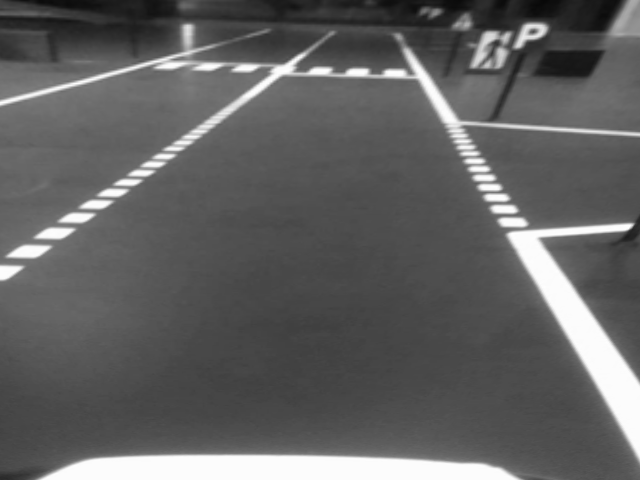

In [262]:
TARGET_W, TARGET_H = 640, 480
def ipm_from_opencv(image, source_points, target_points):
    # Compute projection matrix
    M = cv2.getPerspectiveTransform(source_points, target_points)
    # Warp the image
    warped = cv2.warpPerspective(image, M, (TARGET_W, TARGET_H), flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT,
                                 borderValue=0)
    return warped

image =img

H, W = img.shape

w_start, w_end = img.shape[1]//3 , (img.shape[1]*2)//3
h_start, h_end = img.shape[0]//5 , (img.shape[0]*2)//5

s = np.array([[W//3, H//7], # TOP LEFT 
              [(W*2)//3, H//7  ], # TOP RIGHT
              [(W*2)//9  ,  H], # BOTTOM LEFT
              [(W*8)//9, H]], # BOTTOM RIGHT 
             dtype=np.float32)

# Vertices coordinates in the destination image
t = np.array([[0, 0],
              [640, 0],
              [0, 480],
              [640, 480]], dtype=np.float32)

# Warp the image
warped2 = ipm_from_opencv(image, s, t)

newimg = Image.fromarray(warped2).convert('RGB')

display(newimg)

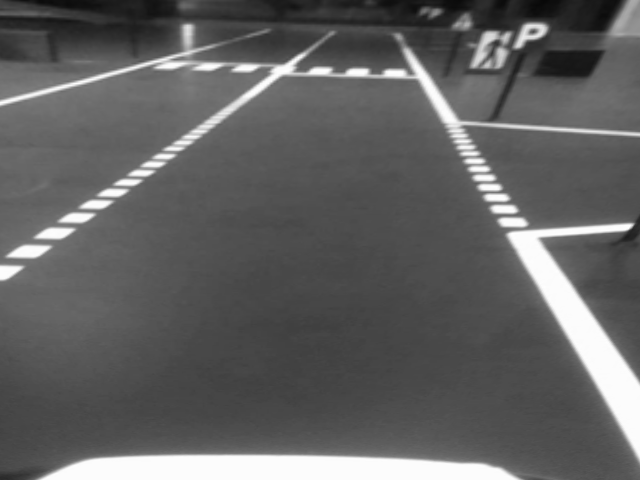

In [261]:
newimg = Image.fromarray(warped2).convert('RGB')

display(newimg)

In [248]:
out_img

array([[107.673, 107.673, 107.673, ..., 107.673, 107.673, 107.673],
       [107.673, 107.673, 107.673, ..., 107.673, 107.673, 107.673],
       [107.673, 107.673, 107.673, ..., 107.673, 107.673, 107.673],
       ...,
       [107.673, 107.673, 107.673, ..., 107.673, 107.673, 107.673],
       [107.673, 107.673, 107.673, ..., 107.673, 107.673, 107.673],
       [107.673, 107.673, 107.673, ..., 107.673, 107.673, 107.673]])

In [229]:
    import time
    
    start = time.time()
    if len(img.shape) == 3:
        img = np.dot(img, [0.299, 0.587, 0.114])
    
    out_img = ipm(img)
    
    newimg = Image.fromarray(out_img).convert('RGB')

    display(newimg)
    
    end = time.time()
    print(end-start)

0.0020020008087158203


In [234]:
out_img.round().max()

255.0

In [228]:
out = np.stack([out_img,out_img,out_img] , axis=-1 )

out.shape

(480, 640, 3)

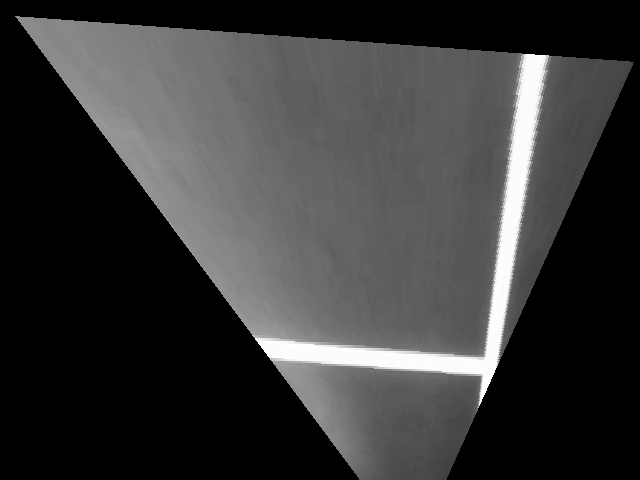

In [33]:
from PIL import Image
from IPython.display import clear_output, display 
newimg = Image.fromarray(out_img).convert('RGB')

display(newimg)